#                                            **Canopy Visualisation Report**

##### Canopy is a boutique streaming platform dedicated to serving French-language movies to its audiences. As they embark on their journey as a streaming service provider, their primary business objectives are:

- offer curated selections of best rated French-language movies from the existing content
- make French-language movies available to various age groups
- identify the least tapped genres so as to provide the filmmakers with data to make original content for Canopy.-
- Does France make longer movies on average based on the runtime?
- Does France make better movies on average based on the ratings?
- Are there any French movies that claim to be of more than one genre? (For eg, Avengers Infinity War is an adventure movie but not comedy, whereas Back to The Future is both.)

**Here are some additional questions that could provide valuable insights to refine Canopy's business strategy:**

- ``Do longer movies tend to have higher ratings?``

- ``Is there an optimal runtime range for well-rated movies?``

- ``Are older movies generally rated higher or lower compared to newer ones?``

- ``Does a particular time period show a spike in highly rated movies?``

- ``Are French movies generally longer or shorter than the overall average?``



As analysts, we will import the data into Jupyter Notebook to conduct an initial exploration, examining its columns and values to gain a thorough understanding of the dataset. During this process, we will identify and address any missing, duplicate, or incorrect data entries. Using Python programming, we will then clean and prepare the data, ensuring it is aligned with Canopy's business objectives for modeling and visualization.

## **1. Data management plan:** 

**1. Project Description**
Purpose: Analyze movie data to support Canopy's business goals, including understanding trends in French-language movies and identifying successful attributes.
Data Collected: Movie metadata including title, year, runtime, IMDb ratings, genres, age classification, country, and language.

**2. Data Collection**
Import Data Source (movieds.csv).

**3. Data Cleaning and Processing**
Handle missing values (e.g., dropping or null).

**4. Data Modeling , Visualasing and Documentation**
Providing explaining dataset columns, cleaning steps,  analysis and Visualisation procedures. 

**5. Data Sharing and Archiving**
Long-term Archiving: Store final datasets and documentation on a secure, for future refrences.

**6. Ethical and Legal Considerations**
Compliance: Ensure compliance with data protection regulations (e.g., GDPR) when handling sensitive or personal data.
Copyright.
Data Ethics: Avoid misrepresentation or misuse of the data in visualizations or conclusions.


## **2.Analysis**:
#### **A) Import the Libraries and Dataset**

In [233]:
#Import Libraries 
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import Range1d
from bokeh.plotting import figure, output_notebook, show , output_file
from bokeh.layouts import row, column
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource 

#Import DataSet
movies = pd.read_csv('movieds.csv')

#print the shape of datasets to confirm they are correctly imported
print(movies.shape)
print()


(15069, 10)




#### **B) Explore the dataset** using ``` head()``` ,```info()``` ,```columns```,```dtype``` to get more familiar with the data and its type of values

In [236]:
#View the DataFrames
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
0,Trigger Pals,1939,NaN,5.3,NaN,Sam Newfield,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,18%,Gonzalo López-Gallego,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,NaN,7.4,NaN,Ja-Ann Wang,"Short,Drama",United States,English,11.0


In [238]:
#View the metadata of datasest
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15069 entries, 0 to 15068
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            15069 non-null  object 
 1   Year             15069 non-null  int64  
 2   Age              6609 non-null   object 
 3   IMDb             14543 non-null  float64
 4   Rotten Tomatoes  4636 non-null   object 
 5   Directors        14396 non-null  object 
 6   Genres           14814 non-null  object 
 7   Country          14672 non-null  object 
 8   Language         14507 non-null  object 
 9   Runtime          14533 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB
None


In [240]:
#Compare the columns
print(movies.columns)

#print data type
print(movies.dtypes)

Index(['Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object


In [242]:
#Sorting the Data By highest Rating: IMDb  (Descending)
hr_movies= movies.sort_values(['IMDb'],ascending= False)
#Print the top 20 French Language movies sorted by highest rating based on IMDb 
hr_movies.head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
9778,My Next Guest with David Letterman and Shah Ru...,2019,NaN,9.3,NaN,NaN,Talk-Show,NaN,NaN,61.0
9408,Love on a Leash,2011,NaN,9.3,NaN,Fen Tian,"Comedy,Drama,Fantasy,Romance",United States,NaN,90.0
13530,Square One,2019,NaN,9.3,NaN,Danny Wu,"Documentary,Drama,Music",United States,English,83.0
14065,Steven Banks: Home Entertainment Center,1989,NaN,9.3,NaN,Tom McLoughlin,Comedy,United States,English,60.0
8456,"Down, But Not Out!",2015,NaN,9.3,NaN,Miguel Gaudêncio,"Documentary,Sport",Poland,Polish,68.0
3220,Natsamrat,2016,NaN,9.1,NaN,Mahesh Manjrekar,"Drama,Family",India,Marathi,166.0
12873,Finding Family,2013,13+,9.1,NaN,"Chris Leslie,Oggi Tomic","Documentary,Family,History,War","United Kingdom,Bosnia and Herzegovina","Bosnian,English",56.0
1286,A Dog Named Gucci,2015,NaN,9.0,NaN,Gorman Bechard,"Documentary,Biography,Drama,News",United States,English,90.0
2448,Escape from Firebase Kate,2015,NaN,9.0,NaN,Paul Kakert,Documentary,United States,English,60.0
7439,Stronger Than Bullets,2017,NaN,8.9,NaN,Matthew Millan,"Documentary,Music,War","United States,Libya,Isle Of Man,United Kingdom...",English,87.0


In [244]:
#Use value_count() function to get the age distribution
age = movies['Age'].value_counts()

#Print the outcome
print(age)
movies.sort_values(['Age'], ascending= False).head(10)

Age
18+    3124
7+     1333
13+    1119
all     739
16+     294
Name: count, dtype: int64


,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
2300,Arjun: The Warrior Prince,2012,all,6.8,57%,Arnab Chaudhuri,"Animation,Action,Adventure",India,Hindi,96.0
6527,Barbie: The Pearl Princess,2013,all,6.2,NaN,Ezekiel Norton,"Animation,Family",NaN,English,73.0
14029,Angela's Christmas,2017,all,7.0,NaN,Damien O'Connor,"Animation,Short,Adventure,Family","Ireland,Canada",English,30.0
14025,The Proud Family Movie,2005,all,5.4,NaN,Bruce W. Smith,"Animation,Adventure,Comedy,Family,Fantasy,Sci-Fi",United States,English,90.0
2887,Ozzy,2016,all,5.2,NaN,"Alberto Rodríguez,Nacho La Casa","Animation,Adventure,Comedy,Family","Spain,Canada","Spanish,English",90.0
14017,How to Build a Better Boy,2014,all,5.5,NaN,Paul Hoen,"Comedy,Family,Sci-Fi",United States,"English,French",90.0
6548,Sanctuary,2017,all,6.6,100%,NaN,"Action,Drama,Fantasy,Mystery,Sci-Fi",Canada,English,44.0
11351,Return from Witch Mountain,1978,all,5.9,50%,John Hough,"Family,Adventure,Sci-Fi,Fantasy",United States,English,95.0
9450,Coach of the Year,1980,all,5.2,NaN,Don Medford,Drama,United States,English,96.0
4332,The Reluctant Dragon,1941,all,6.9,NaN,"Alfred L. Werker,Hamilton Luske,Jack Cutting,U...","Animation,Comedy,Family",United States,English,74.0


In [246]:
#Sorting the Data By Genres  (Descending)
genres =movies.sort_values(['Genres'],ascending= False)
#Print the French Language movies sorted by genres
genres.head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Genres,Country,Language,Runtime
5595,Texas to Bataan,1942,NaN,5.2,NaN,Robert Emmett Tansey,"Western,War",United States,English,56.0
3081,The Range Busters,1940,NaN,6.3,NaN,S. Roy Luby,"Western,Mystery",United States,English,56.0
672,Godmonster of Indian Flats,1973,NaN,3.9,NaN,Fredric Hobbs,"Western,Horror",United States,English,89.0
5085,The Wackiest Wagon Train In The West,1976,all,3.7,NaN,"Jack Arnold,Earl Bellamy,Bruce Bilson,Oscar Ru...","Western,Comedy",United States,English,86.0
10846,Trinity and Sartana Are Coming,1972,NaN,4.4,NaN,Mario Siciliano,"Western,Comedy",Italy,Italian,102.0
637,Wrangler's Roost,1941,NaN,6.1,NaN,S. Roy Luby,Western,United States,English,57.0
9504,The Law of 45's,1935,NaN,5.0,NaN,John P. McCarthy,Western,United States,English,57.0
9228,The Kid's Last Ride,1941,NaN,5.5,NaN,S. Roy Luby,Western,United States,English,55.0
8154,Bury Them Deep,1968,NaN,5.6,NaN,Paolo Moffa,Western,Italy,Italian,109.0
7936,The Far Frontier,1948,NaN,6.7,NaN,William Witney,Western,United States,English,67.0


#### **C) Compute Descriptive Statistics**



In [249]:
#Print Descriptive Statics
print(movies.describe())

               Year          IMDb       Runtime
count  15069.000000  14543.000000  14533.000000
mean    2003.086734      5.907206     93.433978
std       20.592520      1.346995     28.536275
min     1913.000000      0.000000      1.000000
25%     2001.000000      5.100000     82.000000
50%     2012.000000      6.100000     92.000000
75%     2016.000000      6.900000    104.000000
max     2020.000000      9.300000   1256.000000


## **3) Data Wrangling**
#### Check for missing values and duplicate

In [252]:
#Check for Null values
movies.isnull().sum()

Title                  0
Year                   0
Age                 8460
IMDb                 526
Rotten Tomatoes    10433
Directors            673
Genres               255
Country              397
Language             562
Runtime              536
dtype: int64

Since there are many Null values in "Rotten Tomatoes" and there is no use of "Director", decided to exclude them.


In [255]:
#Exluding rotten Tomatoes from data frame 
movies = movies.loc[:, ['Title', 'Year','Age', 'IMDb','Genres','Country','Language','Runtime']]

#view dataframe
movies.head()

,Title,Year,Age,IMDb,Genres,Country,Language,Runtime
0,Trigger Pals,1939,NaN,5.3,"Action,Adventure,Western",United States,English,59.0
1,One Way Astronaut: The Mars One Initiative,2017,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Grave,2013,18+,6.2,"Horror,Mystery,Thriller","United States,Hungary",English,102.0
3,Metallica: Kill 'Em All to St. Anger - The Ult...,2006,NaN,NaN,NaN,NaN,NaN,NaN
4,Beyond the Pale,2014,NaN,7.4,"Short,Drama",United States,English,11.0


In [257]:
#Check the shape of dataframe
movies.shape

(15069, 8)

In [259]:
#Check for Null values and data loss
movies.isnull().sum()

Title          0
Year           0
Age         8460
IMDb         526
Genres       255
Country      397
Language     562
Runtime      536
dtype: int64

##### Since sorting and modeling data is about **French Language movie**, all the ```Null``` values for "Language" column will be dropped, the same process will be done to "IMDb" due to the need of use for its values. Dropped Duplicates using "Title" column. (in case of having duplicate data)

In [262]:
#Drop null values for language column
movies = movies.dropna(subset = ['Language','IMDb'])
movies = movies.drop_duplicates()

# View DataFrame.
print(movies.shape)

(14191, 8)


In [264]:
# View the column names of each DataFrame.
print(movies.columns)

Index(['Title', 'Year', 'Age', 'IMDb', 'Genres', 'Country', 'Language',
       'Runtime'],
      dtype='object')


In [266]:
#Check for null and data loss
movies.isnull().sum()

Title          0
Year           0
Age         7718
IMDb           0
Genres        17
Country       39
Language       0
Runtime      193
dtype: int64

##### Kept the ```Null``` value for "Age" and "Genres" at this stage to prevent losing any French related language values. Later when mentioned columns are going to be used for modelling and comparsion they will be ```Null``` free.

In [269]:
#check the shape for the data loss
movies.shape

(14191, 8)

In [271]:
#Find French language movies and drop the rest of rows that doesnt contain 'French' as 'Language'
fmovies = movies[movies['Language'].str.contains(pat= 'French' , na = False)]
#print the result
fmovies.head()

,Title,Year,Age,IMDb,Genres,Country,Language,Runtime
31,Mystery of the Pink Dolphin,2015,NaN,7.1,Documentary,"France,Brazil","French,English,Portuguese,Dutch",52.0
49,My Revolution,2016,NaN,3.5,Drama,France,French,80.0
54,The Story of the Twelve Apostles,1999,NaN,6.6,"Documentary,Short",United States,"English,French,Spanish",26.0
78,Girl on a Bicycle,2013,18+,6.2,"Comedy,Drama,Romance","Germany,France","English,French,German,Italian",101.0
109,Razzia,2018,NaN,6.2,"Drama,History,War","France,Germany,Hungary","French,German,Yiddish",115.0


In [273]:
#check the shape for the data loss
fmovies.shape

(704, 8)

##### As it shows above, there are **704** French language movies that are going to be used for our visualisation purposes. Now ```Describe()``` function will be used to get data statistics.

#### Dataframe will be saved as CSV for future refrences and ease of use while the main datasets will remain the same.

In [277]:
#At this stage save the new dataset for future use and reference
fmovies.to_csv('French_movies.csv')

In [279]:
# Compute descriptive statistics of DataFrame.
# Round to two decimals.
fmovies.describe().round(2)

,Year,IMDb,Runtime
count,704.00,704.00,701.00
mean,2005.17,6.37,101.18
std,18.80,1.01,24.64
min,1920.00,2.30,13.00
25%,2004.00,5.90,90.00
50%,2012.00,6.50,100.00
75%,2016.00,7.10,113.00
max,2020.00,8.80,334.00


## **4.Modelling and Transforming Data:**

#### Specify Genres repetition for French Language Movies

In [283]:
#Split the Genres values in French movies using str.split()
genres=fmovies['Genres'].dropna().str.split(',')

#Count and print the values for Genres
print(genres.value_counts())

Genres
[Drama]                                    66
[Documentary]                              51
[Comedy, Drama]                            31
[Drama, Romance]                           31
[Comedy]                                   22
                                           ..
[Action, Comedy, Thriller]                  1
[Animation, Adventure, Comedy]              1
[Comedy, Drama, Fantasy, Horror]            1
[Action, Drama, Sci-Fi]                     1
[Action, Crime, Horror, Mystery, Sport]     1
Name: count, Length: 274, dtype: int64


In [285]:
#Convert genres column values to row for counting the correct repetition of the genres using explode()
genres= genres.explode()

#Count and print the values for Genres
print(genres.value_counts())

Genres
Drama          422
Comedy         171
Thriller       157
Romance        155
Action         101
Adventure       96
Documentary     94
Crime           83
Mystery         73
Family          63
History         62
Biography       59
Fantasy         57
War             54
Horror          44
Animation       42
Sci-Fi          37
Music           29
Musical         19
Sport           11
Western         10
Short            6
News             4
Name: count, dtype: int64


#### Above showing all the **Genres** available and their counts in French Language movies. Below similar process will be done for **Age** and  **Country.**

#### Top 20 Rated Movies

In [289]:
#Sorting the Data By highest Rating :IMDb and Rotten Tomato (Descending)
hr_fmovies=fmovies.sort_values(['IMDb'],ascending= False)
#Print the top 20 French Language movies sorted by highest rating based on IMDb and Rotten Tomatoes
hr_fmovies.head(20)

,Title,Year,Age,IMDb,Genres,Country,Language,Runtime
876,Inception,2010,13+,8.8,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2898,"Inner Worlds, Outer Worlds",2012,NaN,8.6,"Documentary,History",Canada,"English,French,Spanish,German,Hindi,Polish",122.0
1928,Home,2009,NaN,8.6,"Animation,Adventure,Comedy,Family,Fantasy,Sci-Fi",United States,"English,French",94.0
7604,The Green Mile,1999,18+,8.6,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0
917,It's a Wonderful Life,1946,7+,8.6,"Drama,Family,Fantasy",United States,"English,French",130.0
10693,Beyond the Summits,2009,NaN,8.5,Documentary,France,French,80.0
2824,The Lion King,1994,all,8.5,"Animation,Adventure,Drama,Family,Musical","United States,United Kingdom","English,Xhosa,Zulu,French,Spanish",118.0
12246,Django Unchained,2012,18+,8.4,"Drama,Western",United States,"English,German,French,Italian",165.0
10469,The Weekend Sailor,2016,NaN,8.3,Documentary,"Mexico,Canada","English,Spanish,French,Portuguese",73.0
2219,Inglourious Basterds,2009,18+,8.3,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


#### Age:

In [292]:
#Use value_count() function to get the age distribution
age = fmovies['Age'].value_counts()
#Print the outcome
print(age)

Age
18+    164
13+     73
7+      66
all     27
16+     13
Name: count, dtype: int64


In [294]:
#print the top 20 most repeated Age
print('Top 20 Most Repeated Age')
print(hr_fmovies.head(20).Age.mode())

#print the most repeated Age
print('Most Repeated Age')
print(fmovies.Age.mode())

Top 20 Most Repeated Age
0    18+
Name: Age, dtype: object
Most Repeated Age
0    18+
Name: Age, dtype: object


#### Country:

In [297]:
# Unique values.
# List of countries.
print(movies.Country.nunique())
movies.Country.unique()

1172


array(['United States', 'United States,Hungary', 'Russia', ...,
       'United States,Australia,Papua New Guinea,Poland,United Kingdom',
       'United States,Armenia', 'Austria,France'], dtype=object)

In [299]:
# Count number of participants per country.
# df_fin.Country.value_counts()
countries = pd.DataFrame(fmovies.Country.value_counts())

# View the DataFrame.
countries

,count
Country,
United States,187
France,127
Canada,40
"France,Belgium",34
United Kingdom,25
...,...
"Denmark,Norway,Sweden,Belgium",1
"Finland,Germany,Canada,Sweden,France",1
"Italy,Monaco,France",1


#### Showing French Language movies by Age groupes and Genres

In [302]:
# Determine Movies by Age: Genres 
# Use GroupBy
fmovies.groupby(['Age','Genres']).min()

Title  \
Age Genres                                                                             
13+ Action,Adventure,Biography,Drama,Romance                           The Aeronauts   
    Action,Adventure,Comedy,Crime                        Austin Powers in Goldmember   
    Action,Adventure,Comedy,Fantasy,Horror,Mystery,...            The Brothers Grimm   
    Action,Adventure,Crime,Mystery,Romance,Thriller                      The Tourist   
    Action,Adventure,Drama                                            Disappearances   
...                                                                              ...   
all Comedy,Family,Sci-Fi                                   How to Build a Better Boy   
    Documentary                                                             CodeGirl   
    Drama                                                     BPM (Beats per Minute)   
    Drama,Mystery                                                      The Moustache   
    Family,Animation                                    Babar: King of the Elephants   

                                                        Year  IMDb  \
Age Genres                                                           
13+ Action,Adventure,Biography,Drama,Romance            2019   6.6   
    Action,Adventure,Comedy,Crime                       2002   6.2   
    Action,Adventure,Comedy,Fantasy,Horror,Mystery,...  2005   5.9   
    Action,Adventure,Crime,Mystery,Romance,Thriller     2010   6.0   
    Action,Adventure,Drama                              2007   4.9   
...                                                      ...   ...   
all Comedy,Family,Sci-Fi                                2014   5.5   
    Documentary                                         2009   6.3   
    Drama                                               2017   7.4   
    Drama,Mystery                                       2005   6.7   
    Family,Animation                                    1999   6.1   

                                                                                            Country  \
Age Genres                                                                                            
13+ Action,Adventure,Biography,Drama,Romance                           United Kingdom,United States   
    Action,Adventure,Comedy,Crime                                                     United States   
    Action,Adventure,Comedy,Fantasy,Horror,Mystery,...  United States,Czech Republic,United Kingdom   
    Action,Adventure,Crime,Mystery,Romance,Thriller       United States,France,Italy,United Kingdom   
    Action,Adventure,Drama                                                            United States   
...                                                                                             ...   
all Comedy,Family,Sci-Fi                                                              United States   
    Documentary                                                                              France   
    Drama                                                                                    France   
    Drama,Mystery                                                                            France   
    Family,Animation                                                          Canada,France,Germany   

                                                                                      Language  \
Age Genres                                                                                       
13+ Action,Adventure,Biography,Drama,Romance                              English,French,Latin   
    Action,Adventure,Comedy,Crime                               English,Japanese,German,French   
    Action,Adventure,Comedy,Fantasy,Horror,Mystery,...           English,French,German,Italian   
    Action,Adventure,Crime,Mystery,Romance,Thriller     English,French,Italian,Russian,Spanish   
    Action,Adventure,Drama                                                      English,French 

### Determine if France makes longer movies on average based on runtime.
 - Extract movies produced in France from the "Country" column.
 
 - Compare the average runtime of French movies with the overall dataset.

In [305]:
#Filter the movies Made in France 
france_movies = fmovies[fmovies['Country'].str.contains('France', na=False)]

france_movies.head()


,Title,Year,Age,IMDb,Genres,Country,Language,Runtime
31,Mystery of the Pink Dolphin,2015,NaN,7.1,Documentary,"France,Brazil","French,English,Portuguese,Dutch",52.0
49,My Revolution,2016,NaN,3.5,Drama,France,French,80.0
78,Girl on a Bicycle,2013,18+,6.2,"Comedy,Drama,Romance","Germany,France","English,French,German,Italian",101.0
109,Razzia,2018,NaN,6.2,"Drama,History,War","France,Germany,Hungary","French,German,Yiddish",115.0
228,Planetarium,2016,NaN,4.6,"Drama,Fantasy,Mystery,Romance,Thriller","France,Belgium","English,French",105.0


## **4) Visualisation**:



**Exploratory Visualizations**
**Purpose:** Used during the analysis phase to uncover patterns, trends, and relationships in the data.

**Explanatory Visualization**
The distribution of genres in French movies was analyzed to understand the variety and prevalence of different types of movies. Multi-genre movies were highlighted to see their contribution to the diversity of content.
Relationships between variables, such as runtime and IMDb rating, were explored to detect any meaningful trends. For instance, we analyzed how runtime varies with movies' popularity and whether longer or shorter movies tend to have higher ratings.

**Audience:** Typically the data analyst or team working on the dataset.

**For example:**

Scatter plots to explore relationships between variables.

Histograms with KDE to investigate distribution and skewness.

Bar chart highlighting the key difference between two categories.


In [309]:
#Import Matplotlib and seaborn and Bokeh
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import Range1d
from bokeh.plotting import figure, output_notebook, show , output_file
from bokeh.layouts import row, column
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource 

# Filter movies produced in France
french_movies = movies[movies['Country'].str.contains('France', na=False)]

# Display the first few rows of French movies to verify the filtering process
french_movies.head()


,Title,Year,Age,IMDb,Genres,Country,Language,Runtime
7,Manderlay,2005,NaN,7.3,Drama,"Denmark,Sweden,Netherlands,France,Germany,Unit...",English,139.0
31,Mystery of the Pink Dolphin,2015,NaN,7.1,Documentary,"France,Brazil","French,English,Portuguese,Dutch",52.0
37,Sherlock Gnomes,2018,7+,5.2,"Animation,Adventure,Comedy,Family,Fantasy,Myst...","United Kingdom,United States,India,Canada,Fran...","English,Mandarin",86.0
49,My Revolution,2016,NaN,3.5,Drama,France,French,80.0
78,Girl on a Bicycle,2013,18+,6.2,"Comedy,Drama,Romance","Germany,France","English,French,German,Italian",101.0


### Visualization using Matlibplot


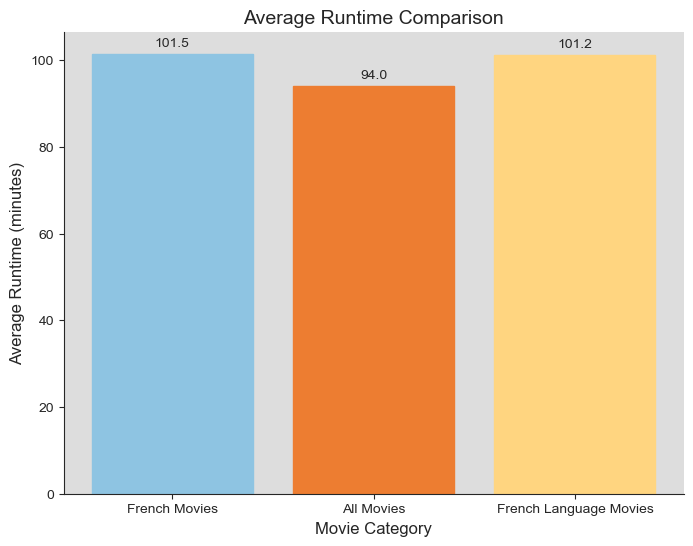

(101.4969040247678, 94.03643377625374, 101.17689015691869)

In [312]:
# Calculate average runtimes
avg_runtime_french = french_movies['Runtime'].mean()
avg_runtime_overall = movies['Runtime'].mean()
avg_runtime_french_language = fmovies['Runtime'].mean()

# Set figure size and create plots.
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# Create a bar plot
avg_time = ax.bar(['French Movies', 'All Movies', 'French Language Movies'], 
              [avg_runtime_french, avg_runtime_overall, avg_runtime_french_language])

# Set the colors
avg_time[0].set_color("#8EC4E2")
avg_time[1].set_color('#ED7D31')
avg_time[2].set_color('#FFD580')

# Add annotations on top of the bars
for bar in avg_time:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  
            f'{bar.get_height():.1f}', ha='center', va='bottom')



# Specify the title and labels
ax.set_title('Average Runtime Comparison', fontsize=14)
ax.set_ylabel('Average Runtime (minutes)', fontsize=12)
ax.set_xlabel('Movie Category', fontsize=12)
plt.grid(axis='x', linestyle='', alpha=0.7)
# Display the chart
plt.show(avg_time)

# Save a special file.
fig.savefig("AVG_runtime_print.png", dpi=300)
fig.savefig("AVG_runtime_web.png", dpi=72)

#Show Output
avg_runtime_french, avg_runtime_overall, avg_runtime_french_language


**The average runtime comparison is as follows:**

**French Movies: 101.5 minutes**

**All Movies: 94 minutes**

**French Language Movies: 101.2 minutes**

The code provided uses a color gradient to emphasize differences in the genre count distribution. It assigns a red-to-light-blue color scale, where red highlights the highest values and light blue represents the lowest.

### Why Use a Bar Plot for Average Runtime and Movie Category?
A bar plot is an effective choice for comparing average runtimes across different movie categories because:

**1. Categorical Data**
Movie categories (e.g., "French Movies" vs. "All Movies") are discrete, categorical variables.
A bar plot is ideal for visualizing comparisons across such categories because it clearly shows the differences.

**2. Easy Comparison**
A bar plot allows for quick and intuitive comparisons of the average runtimes between the categories:

``Are French movies generally longer or shorter than the overall average?``

This comparison is immediately visible from the heights of the bars.

**3. Simplistic and Focused**
A bar plot is simple and avoids unnecessary clutter, making it ideal for audiences who want straightforward insights into runtime differences.
It provides a focused view on averages without the distraction of individual data points.

#### **Why Is This Important for Canopy?**
Understanding average runtimes helps Canopy curate content that aligns with audience expectations:
If French movies are typically longer, Canopy can use this insight to market them as immersive experiences.
Conversely, if shorter runtimes are preferred, Canopy can prioritize acquiring or producing shorter films.

### Visualization Using Seaborn

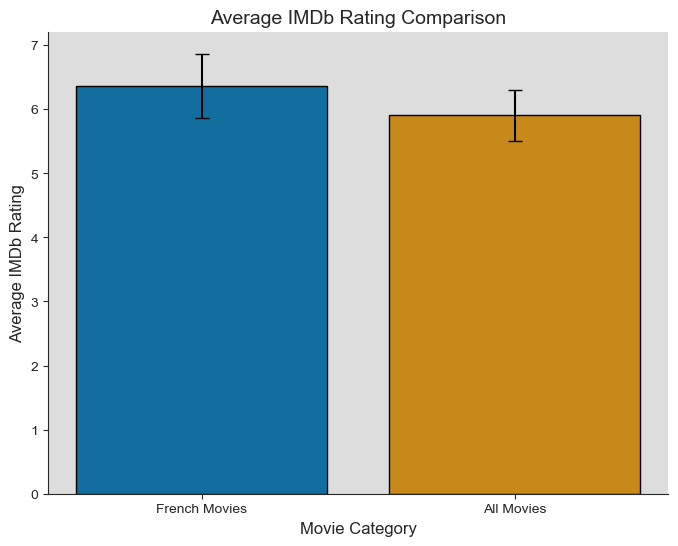

(6.368412942989215, 5.905425974209005)

In [316]:
#Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Calculate average for IMDb
avg_imdb_french = french_movies['IMDb'].mean() 
avg_imdb_overall = movies['IMDb'].mean()

# Create a dictionary for ratings
avg_ratings = {
    'Category': ['French Movies', 'All Movies'],
    'Average IMDb Rating': [avg_imdb_french, avg_imdb_overall],
    'Color': ['#8EC4E2', '#ED7D31']  # Colors for the bars
}

#create data frame     
ratings_df = pd.DataFrame(avg_ratings)

# Standard deviation or error values
errors = [0.5, 0.4]  

# Create figure
plt.figure(figsize=(8, 6))

# Seaborn Bar Plot
sns.set_style("ticks", {
    "axes.facecolor": "#dddddd",
    "axes.spines.top": False,
    "axes.spines.right": False
})



sns.barplot(
   data=ratings_df,
    x='Category',
    y='Average IMDb Rating',
    hue ='Category',
    edgecolor='black',
    linewidth=1,
    saturation=0.8,
    palette="colorblind" #For audiance who have eyesight issues
)

# Add error bars
for i, category in enumerate(ratings_df['Category']):
    plt.errorbar(
        x=i, 
        y=ratings_df['Average IMDb Rating'][i], 
        yerr=errors[i], 
        fmt='none', 
        ecolor='black', 
        capsize=5
    )

# Add labels and title
plt.title('Average IMDb Rating Comparison', fontsize=14)
plt.ylabel('Average IMDb Rating', fontsize=12)
plt.xlabel('Movie Category', fontsize=12)

# Show the chart
plt.show()

#show output
avg_imdb_french, avg_imdb_overall

**The average ratings comparison reveals:**

**IMDb Ratings:**

**French Movies: 6.34**

**All Movies: 5.9**



### Why Use a Bar Plot for IMDb Ratings and Movie Category?

A bar plot is an excellent choice for visualizing average IMDb ratings across different movie categories because it effectively represents categorical data in a way that is both intuitive and accessible. Its simplicity makes it easy to understand, even for audiences with minimal knowledge of charts. By displaying the average IMDb ratings as the height of bars, it allows for quick and clear comparisons between categories, making it a powerful tool for conveying insights at a glance.

#### **Why Is This Important for Canopy?**
IMDb ratings provide a measure of audience satisfaction and quality. Comparing categories helps Canopy:
Determine if French-language movies are performing as well as the overall market.
Use this insight to decide whether to focus on boosting quality or emphasizing their niche.


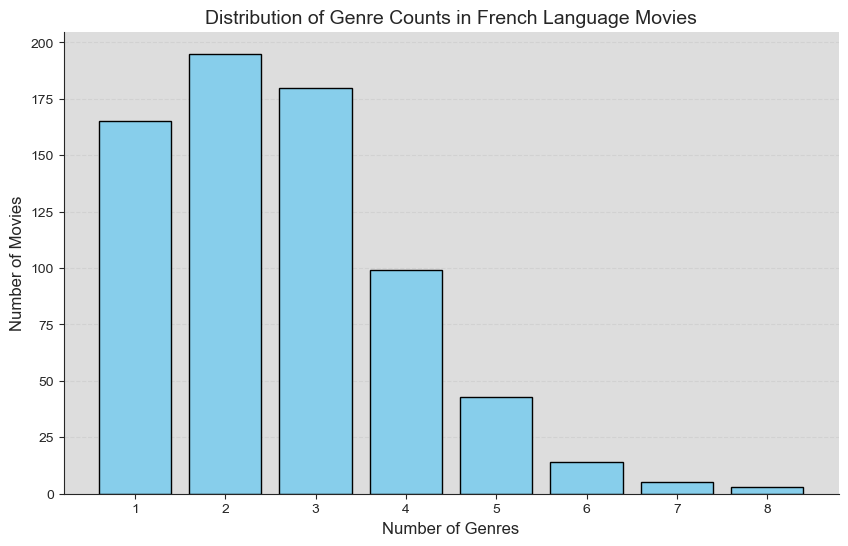

539

In [322]:
# Count the number of genres for each movie
french_movies_cleaned = french_movies_cleaned.copy()  # Avoid Setting With Copy Warning
fmovies.loc[:, 'Genre Count'] = fmovies['Genres'].str.count(',') + 1  #To devied and count the genres I used it count the (,) +1 to count the values of gnere

# Check for French movies with more than one genre
multi_genre_movies = fmovies[fmovies['Genre Count'] > 1] 

# Count movies by number of genres
genre_distribution = fmovies['Genre Count'].value_counts().sort_index()

# Plot the distribution
bars_3 = plt.figure(figsize=(10, 6))
plt.bar(genre_distribution.index, genre_distribution.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Genre Counts in French Language Movies', fontsize=14)
plt.xlabel('Number of Genres', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(genre_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

multi_genre_movies_count = len(multi_genre_movies)
multi_genre_movies_count


### Above we have distribution for France Language Movies in which 539 of them have more than one genres.

For the same reasons mentioned earlier, a bar chart was chosen to explore the relationship between the number of movies and their associated genres. This approach provides a clear visualization of how many movies fall into categories with one or multiple genres, offering valuable insights into genre diversity and its prevalence among the movies analyzed.

#### **Why Is This Important for Canopy?**
Understanding the distribution of genre counts helps Canopy identify trends in movie diversity:
If most successful movies are multi-genre, Canopy might focus on acquiring or producing such content.
Conversely, if single-genre movies dominate, Canopy can emphasize their niche appeal.

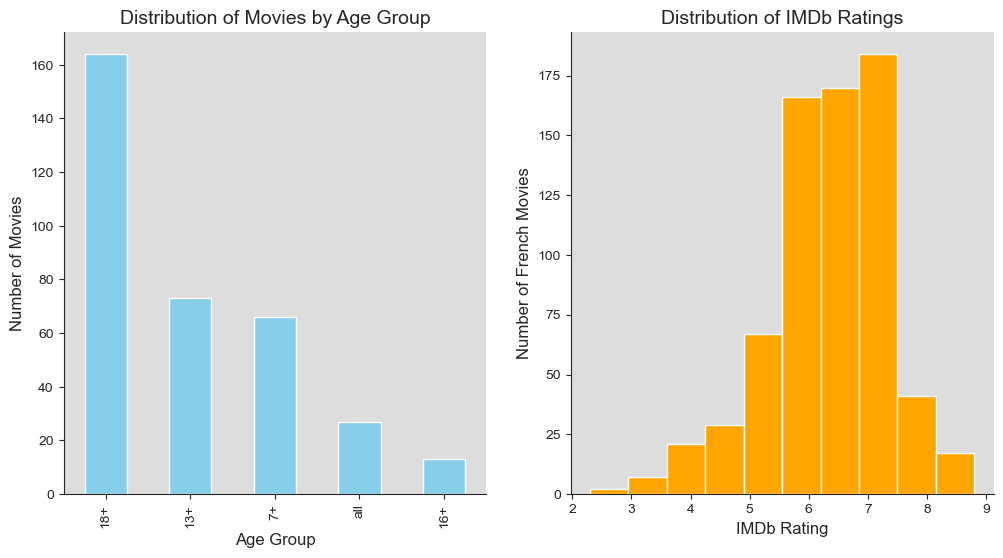

In [324]:
# Create histograms for Age and IMDb ratings
plt.figure(figsize=(12, 6))

# Plot for Age distribution
plt.subplot(1, 2, 1)
fmovies['Age'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Movies by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Histogram for IMDb ratings distribution
plt.subplot(1, 2, 2)
plt.hist(fmovies['IMDb'], bins=10, color='orange')
plt.title('Distribution of IMDb Ratings', fontsize=14)
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Number of French Movies', fontsize=12)

#Show the plot
plt.show()


### Age Distribution: Bar Plot

 A bar plot is ideal for categorical data, such as age groups (13+, 18+, etc.), where the values represent discrete categories rather than continuous numerical ranges.
 Each bar represents the count or frequency of movies in a specific age category, making it easy to compare the number of movies available for different age groups.
 This type of plot helps highlight the diversity of content Canopy offers for viewers of various age groups.


### IMDb Rating Distribution: Histogram

 A histogram is used for continuous numerical data, such as IMDb ratings, which range between 0 and 10.
 The plot divides the range of ratings into bins (intervals) and shows how many movies fall within each bin.
 This helps analyze the distribution of ratings and identify patterns:
 Skewness: Whether most ratings are clustered toward the higher end (right-skewed) or lower end (left-skewed).
 Central Tendency: The average rating or where most ratings are concentrated.
 For Canopy, understanding the distribution of ratings can guide content selection by identifying the proportion of highly rated movies.


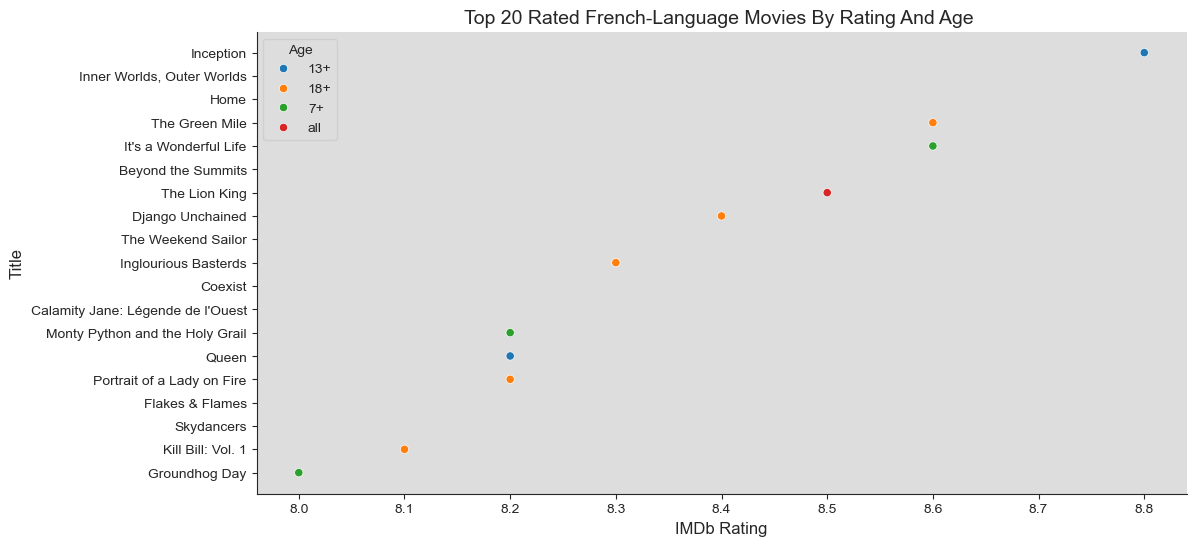

In [327]:
# Create a bar plot for top-rated movies
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=hr_fmovies.head(20),  # Ensure the DataFrame name is correct
    x='IMDb',
    y='Title',
    hue='Age',
    marker = 'o'
)
# Add labels and title
plt.title('Top 20 Rated French-Language Movies By Rating And Age ', fontsize=14)
plt.xlabel('IMDb Rating', fontsize=12)
plt.ylabel('Title', fontsize=12)


# Show the plot
plt.show()



### Why Use a Scatter Plot for the Analysis?
#### A scatter plot is an effective choice for visualizing the relationship between multiple attributes of the top 20 movies because:

**Visualizing Relationships:**

A scatter plot allows us to observe how two variables (e.g., IMDb rating and Age) interact.
It helps identify trends, clusters, or outliers.

**Handling Multiple Dimensions:**

Using colors, shapes, or sizes, a scatter plot can incorporate additional dimensions of data. For example:
Color: Differentiate movies by age rating (PG, 13+, 18+).

Scatter plots make it easy to compare attributes across all 20 movies at a glance, allowing us to derive actionable insights.

#### **Why Is This Important for Canopy?**
By using a scatter plot ,We can see which combinations of attributes (e.g. rating, age suitability) have historically performed better.
This aids in predicting what might work for Canopy’s curated selections, helping refine content acquisition and audience targeting strategies.

### Visualization using Bokeh


In [331]:
movies = pd.read_csv('movieds.csv')
# Create plot for Year vs IMDb
p = figure(width=500,
           height=500,
           x_range=(0, 10),
           y_range=(1900, 2020),
           title="Year vs IMDb")

# Set the labels.
p.xaxis.axis_label = "IMDb"
p.yaxis.axis_label = "Year"

# Create scatter plot.
p.scatter(x="IMDb", y="Year", source= movies)

#Display the plot
curdoc().add_root(p)
show(p)

### Why Use a Scatter Plot for Year and IMDb Rating?
A scatter plot is particularly well-suited for visualizing the relationship between the release year and IMDb ratings because:

**1. Visualizing Trends Over Time**
A scatter plot helps identify patterns in movie ratings over the years:

``Are older movies generally rated higher or lower compared to newer ones?``

``Does a particular time period show a spike in highly rated movies?``

**2. Spotting Outliers**
A scatter plot easily highlights outliers:
For instance, a highly rated movie from an unexpected era might stand out, offering insight into unique patterns.
Similarly, poorly rated movies in a strong year might suggest anomalies or trends to avoid.

**3. Understanding Audience Preferences**
IMDb ratings reflect audience approval and preferences. By plotting them against release years:
We can assess whether audiences prefer recent movies or classics.
It provides insight into whether the top-rated movies belong to a specific period, helping curate content for viewers seeking nostalgic or contemporary experiences.

**4. Identifying Gaps**
The scatter plot may reveal gaps where there are few or no high-rated movies in certain years.
These gaps could represent opportunities for curating or producing content to fill underserved periods.

#### **Why Is This Important for Canopy?**
Canopy can use this information to decide if their curated French-language films should focus on certain time periods.
If high-rated movies are concentrated in specific decades, Canopy might target films from those years to attract a larger audience.

Loading BokehJS ...

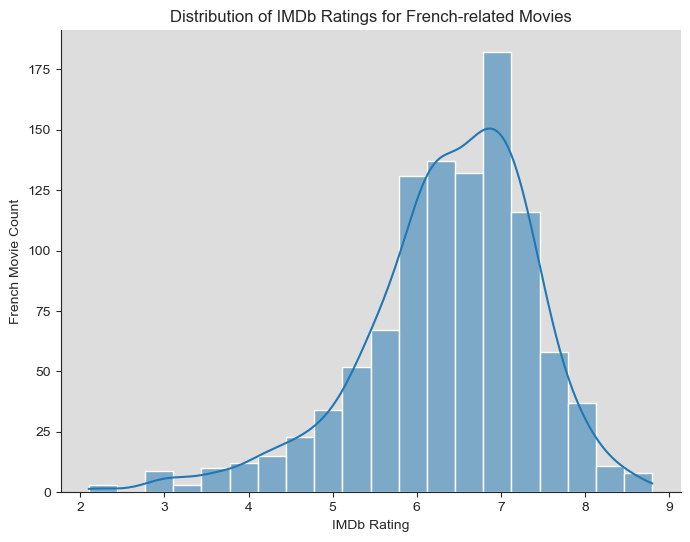

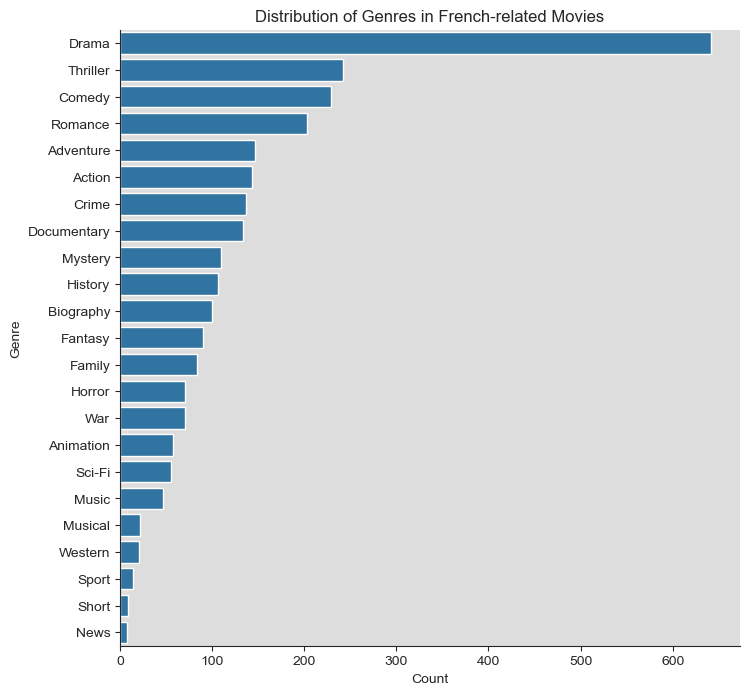

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook , curdoc , output_file
import pandas as pd
from bokeh.models import ColumnDataSource ,HoverTool

#Import Data
movies = pd.read_csv('movieds.csv')

# Enable Bokeh visualization
output_notebook()

# Filter for movies involving French language or made in France
french_movies = movies[movies['Language'].str.contains('French', na=False) | 
                           movies['Country'].str.contains('France', na=False)]

# Calculate average runtimes
avg_runtime_french = french_movies['Runtime'].mean()
avg_runtime_overall = movies['Runtime'].mean()

# Prepare data for Bokeh
categories = ['French Movies', 'All Movies']
values = [avg_runtime_french, avg_runtime_overall]
colors = ["#ED7D31", "#8EC4E2", ]

# Create a data source for the plot
source = ColumnDataSource(data={'categories': categories, 'values': values, 'colors': colors})

# Create a Bokeh figure
p = figure(
    x_range=categories,
    title="Average Runtime Comparison",
    x_axis_label="Movie Category",
    y_axis_label="Average Runtime (minutes)",
    height=400,
    width=500,
    tools="pan,box_zoom,reset"
)

# Create the bar chart
p.vbar(
    x='categories',
    top='values',
    width=0.6,
    color='colors',
    source=source
)

# Add text annotations to display the exact values
for idx, value in enumerate(values):
    p.text(
        x=[categories[idx]], 
        y=[value + 2],  # Adjust the height of annotations slightly above the bar
        text=[f"{value:.1f}"],
        text_align="center",
        text_baseline="middle",
        text_font_size="10pt"
    )

# Add the plot to the current Bokeh document
#curdoc().add_root(p)

# Display the chart
#show(p)

# Output the computed averages
avg_runtime_french, avg_runtime_overall



#_____________________________________________________#


# Calculate average IMDb ratings
avg_imdb_french = french_movies_cleaned['IMDb'].mean()
avg_imdb_overall = movies['IMDb'].mean()

# Create a dictionary for ratings
avg_ratings = {
    'Category': ['French Movies', 'All Movies'],
    'Average IMDb Rating': [avg_imdb_french, avg_imdb_overall],
    'Color': ['#ED7D31', '#8EC4E2']  # Colors for the bars
}

# Convert data into a ColumnDataSource for Bokeh
source = ColumnDataSource(avg_ratings)

# Create a Bokeh figure
p1 = figure(
    x_range=avg_ratings['Category'],
    title="Average IMDb Rating Comparison",
    x_axis_label="Movie Category",
    y_axis_label="Average IMDb Rating",
    height=400,
    width=500,
    tools="pan,box_zoom,reset"
)

# Create the bar chart using colors from the data source
p1.vbar(
    x='Category', 
    top='Average IMDb Rating', 
    width=0.6, 
    color='Color',  # Reference the 'Color' field from the data source
    source=source
)



# Style the plot
p1.title.text_font_size = "14pt"
p1.xaxis.major_label_orientation = 1
p1.xgrid.grid_line_color = None

# Show the plot
#show(p1)

#_______________________________________________________#

# Prepare the data
french_movies_cleaned = french_movies_cleaned.copy()  # Avoid Setting With Copy Warning
french_movies_cleaned['Genre Count'] = french_movies_cleaned['Genres'].str.count(',') + 1

# Calculate genre distribution
genre_distribution = french_movies_cleaned['Genre Count'].value_counts().sort_index()

# Convert the distribution to a DataFrame for Bokeh
genre_data = pd.DataFrame({
    'Genre Count': genre_distribution.index,
    'Number of Movies': genre_distribution.values
})

# Create a ColumnDataSource
source = ColumnDataSource(genre_data)

# Create a Bokeh figure
p2 = figure(
    x_range=[str(x) for x in genre_distribution.index],  # Convert genre counts to strings for categorical x-axis
    title="Distribution of Genre Counts in French Language Movies",
    x_axis_label="Number of Genres",
    y_axis_label="Number of Movies",
    height=400,
    width=700,
    tools="pan,box_zoom,reset"
)

# Add a bar plot
p2.vbar(
    x='Genre Count', 
    top='Number of Movies', 
    width=0.5, 
    color='skyblue', 
    source=source
)

# Style the plot
p2.title.text_font_size = "14pt"
p2.xaxis.axis_label_text_font_size = "12pt"
p2.yaxis.axis_label_text_font_size = "12pt"
p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_dash = [6, 4]
p2.ygrid.grid_line_alpha = 0.7

# Display the chart
#show(p2)

#_________________________________________________________#

# Exploratory Visualization: IMDb ratings comparison
# Set figure size and create plot.
plt.figure(figsize=(8, 6))

# KDE curve can provide a more meaningful visualization by smoothing out noise,making the trends clearer.
sns.histplot(french_movies_cleaned['IMDb'], kde=True, bins=20) 
plt.title("Distribution of IMDb Ratings for French-related Movies")
plt.xlabel("IMDb Rating")
plt.ylabel("French Movie Count")

# Display the chart
plt.show()

#_________________________________________________________#
    
# Create a ColumnDataSource
french_movies_cleaned['Color'] = french_movies_cleaned['IMDb'].apply(lambda x: 'red' if x > 5 else 'navy')
source = ColumnDataSource(french_movies_cleaned)

# Bokeh Visualization: IMDb Rating vs Runtime
rate_time = figure(
    title="IMDb Ratings vs Runtime for French-related Movies",
    x_axis_label='Runtime (minutes)', 
    y_axis_label='IMDb Rating',
    width=500, 
    height=400
)

# Create a scatter plot with conditional coloring
rate_time.scatter(
    'Runtime', 
    'IMDb', 
    size=10, 
    color='Color', 
    alpha=0.5, 
    source=source
)
# Add a HoverTool to display additional information
hover = HoverTool()
hover.tooltips = [
    ("Title", "@Title"),  # Add movie title
    ("IMDb Rating", "@IMDb"),
    ("Runtime", "@Runtime"),
    ("Genres", "@Genres"),
    ("(x, y)", "($x, $y)")  # Display coordinate info
]

# Add the hover tool to the plot
rate_time.add_tools(hover)
layout = column(row(rate_time , p),
          row(p1,p2))

# Display the chart
show(layout)
curdoc().add_root(layout)

#_________________________________________________________#

# Explanatory Visualization: Genre diversity for French-related movies
french_movies_cleaned.loc[: , 'Genres'] = french_movies_cleaned['Genres'].fillna('Unknown')
genre_counts = french_movies_cleaned['Genres'].str.split(',').explode().value_counts()

#Create a figure
plt.figure(figsize=(8, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Distribution of Genres in French-related Movies")
plt.xlabel("Count")
plt.ylabel("Genre")

# Display the chart
plt.show()




In the scatter plot, movies with IMDb ratings above 5 are highlighted in red to enhance visual clarity and emphasize mid to high-rated films in comparison to their runtime. A hover tooltip has been added, allowing users to interactively explore the data for more detailed insights.

In the histogram, IMDb ratings for French movies are analyzed with the inclusion of a KDE (Kernel Density Estimate) curve to provide a smoother representation of the rating trend, clearly highlighting movies with above-average ratings.

For both the average runtime and IMDb ratings by movie category, a color palette optimized for color-blind accessibility has been used, ensuring better comparison and inclusivity. Additionally, annotations are included in the average runtime vs. category chart to display the average value for each category, providing clear and concise context for viewers.

### Why Use a Scatter Plot for IMDb Rating and Runtime?

**1. Visualizing Relationships**
A scatter plot shows how two continuous variables (runtime and IMDb rating) relate to each other.
It helps identify patterns, such as:

``Do longer movies tend to have higher ratings?``

``Is there an optimal runtime range for well-rated movies?``

**2. Spotting Trends and Clusters**
The scatter plot can reveal trends, such as whether highly rated movies are clustered around specific runtimes.
It can also highlight outliers, like extremely short or long movies that received unusually high or low ratings.

**3. Identifying Variability**
Scatter plots capture the variability in the data. For example:
A wide spread of ratings for movies with similar runtimes might suggest that runtime alone isn’t a strong predictor of ratings.
Conversely, a clear trend might indicate that runtime significantly impacts ratings.

**4. Easy to Interpret**
By mapping IMDb ratings to the vertical axis and runtimes to the horizontal axis, the scatter plot provides an intuitive visual representation of the data.
Patterns are easily spotted without needing advanced statistical analysis.

#### **Why Is This Important for Canopy?**
Understanding the relationship between runtime and IMDb ratings helps Canopy decide what type of movies to prioritize:
If higher-rated movies are consistently within a specific runtime range, Canopy can focus on curating films that align with this range.
This insight helps tailor content to match audience preferences for both quality and runtime.


